Objective: To perform 4 Types of Edge Feature Extraction - First
and Second order Edge Extraction in both Horizontal and Vertical Directions respectively.

Points that lie on the edge are detected by:

*   Detecting the local maxima or
minima of the first derivative.
*   Detecting the zero-crossings
of the second derivative.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Task3.jpg to Task3.jpg


In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

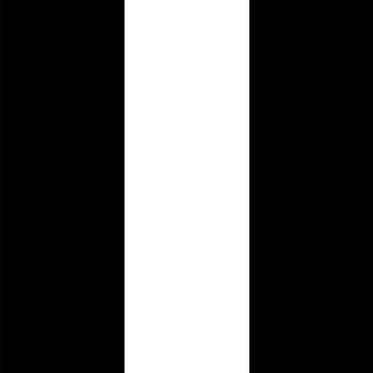

In [ ]:
img = cv2.imread('Task3.jpg')
cv2_imshow(img)

# Image derivatives

**First derivative - gradient** 

In [1]:
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

In [2]:
# peaks in gradient mark the edge locations, and we need to threshold the gradient magnitude to find edges in an image

In [3]:
def plot_image(image, title):
  pylab.imshow(image), pylab.title(title,size=20),pylab.axis('off')

In [10]:
def first_derivatives(imageFile):
  ker_x = [[-1,1]]
  ker_y = [[-1],[1]]
  im = rgb2gray(imread(imageFile)) # imageFile = 'Task3.jpg'

  im_x = signal.convolve2d(im, ker_x, mode='same') 
  im_y = signal.convolve2d(im, ker_y, mode ='same')
  im_mag = np.sqrt(im_x**2 + im_y**2) # gradient magnitude
  im_dir = np.arctan(im_y/im_x) # gradient direction

  return im, im_x, im_y, im_mag, im_dir

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(<matplotlib.axes._subplots.AxesSubplot at 0x7f371b508160>, None)

<Figure size 432x288 with 0 Axes>

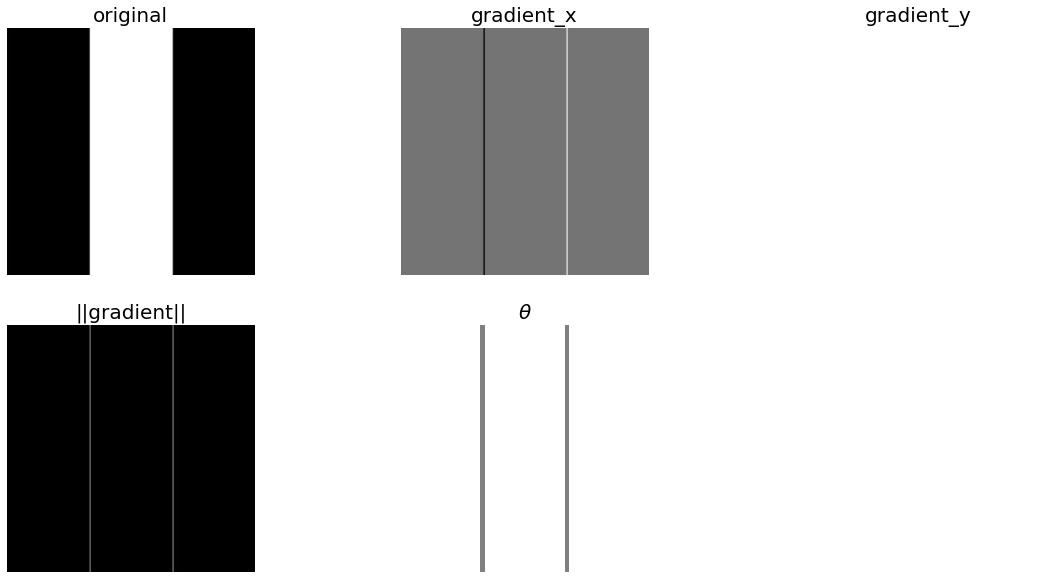

In [13]:
im, im_x, im_y, im_mag, im_dir = first_derivatives('Task3.jpg')
# plotting partial derivatives
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(231), plot_image(im,'original'),
pylab.subplot(232), plot_image(im_x,'gradient_x'),
pylab.subplot(233), plot_image(im_y,'gradient_y'),
pylab.subplot(234), plot_image(im_mag,'||gradient||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$')

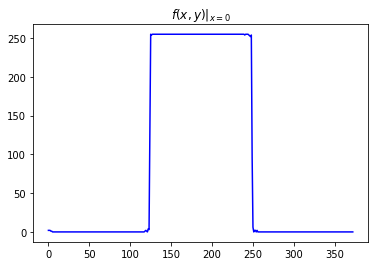

In [18]:
# Pixels from the original image corresponding to a single row (here, row 0)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$')
pylab.title(r'$f(x,y)|_{x=0}$')
pylab.show()

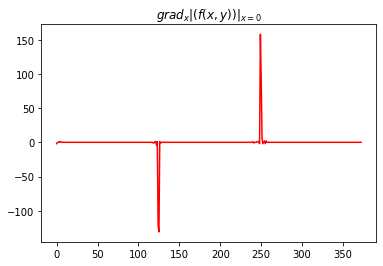

In [19]:
# horizontal image profile for first order derivative
# Pixels from the gradient_x corresponding to a single row (here, row 0)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x(f(x,y))|_{x=0}$')
pylab.title(r'$grad_x|(f(x,y))|_{x=0}$')
pylab.show()

In [20]:
# in case of the original image , a square wave corresponding to alternating white and black intensity pattern can be seen
# whereas the gradient magnitude for the same set of pixels have spikes due to sudden increase/decrease in intensity, corresponding to vertical edges

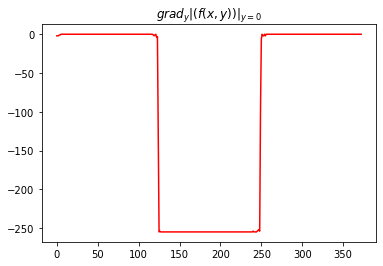

In [53]:
# vertical image profile for first order derivative
# Pixels from the gradient_y corresponding to a single row (here, row 0)
pylab.plot(range(im.shape[1]), im_y[0,:], 'r-', label=r'$grad_y(f(x,y))|_{y=0}$')
pylab.title(r'$grad_y|(f(x,y))|_{y=0}$')
pylab.show()

**Second derivative - Laplacian**

In [32]:
import scipy
from cv2 import Laplacian

In [48]:
def second_derivatives(imageFile):
  kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
  im = rgb2gray(imread(imageFile)) # imageFile = 'Task3.jpg'
  im_secondOrder = signal.convolve2d(im, kernel, mode ='same')
  im_lap = Laplacian(im,cv2.CV_16S) 
  # converting back to uint8
  abs_dst = cv2.convertScaleAbs(im_lap)
  return im, im_secondOrder, im_lap

(<matplotlib.axes._subplots.AxesSubplot at 0x7f37130eeba8>, None)

<Figure size 432x288 with 0 Axes>

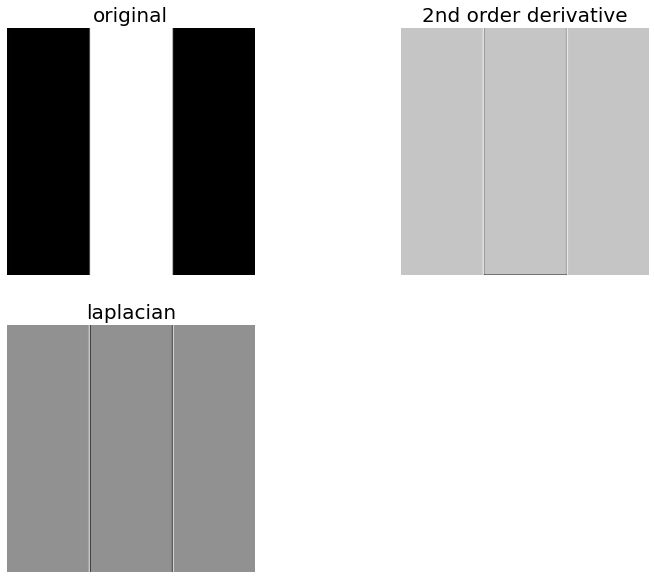

In [54]:
im, im_secondOrder, im_lap = second_derivatives('Task3.jpg')
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(231), plot_image(im,'original'),
pylab.subplot(232), plot_image(im_secondOrder,'2nd order derivative'),
pylab.subplot(234), plot_image(im_lap,'laplacian')

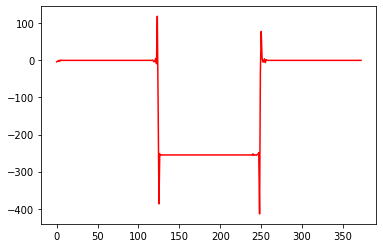

In [52]:
# Horizontal Image Profile for 2nd order derivative
pylab.plot(range(im.shape[1]), im_secondOrder[0,:], 'r-', label='second-order')
pylab.show()